In [ ]:
import os, pickle, sqlite3
import matplotlib.pylab as pyl
from tkinter.filedialog import askopenfilename

In [ ]:
filename = askopenfilename()
with open(filename, 'rb') as f:
    data = pickle.load(f)

In [ ]:
timestamps = []
for x in range(len(data)):
    for y in data[x].keys():
        timestamps.append(y)

In [ ]:
#if input('Do you want to work with data from the sqlite database? [y/n]').lower() == 'y':
db = sqlite3.Connection('db.sqlite')
curs = db.cursor()
tables = curs.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;").fetchall()[2:]
tables = [x[0] for x in tables]
for x in tables:
    start_time = curs.execute('SELECT MIN(Timestamp) FROM ' + x + ';').fetchall()[0][0]
    if start_time > timestamps[0] and start_time < timestamps[-1]:
        table = x
        break
try:
    print('Using table: ' + table)
except NameError:
    print('Could not find a table with timestamps matching EEG data.')
    table = None
    curs.close()
    db.close()
#else:
#    table = None
#
os.chdir(os.path.dirname(filename))

In [ ]:
deltas = []
thetas = []
alphas = []
betas = []
gammas = []

In [ ]:
for x in range(len(data)):
    for y in data[x].values():
        for z in range(len(y[0])):
            if z == 0:
                deltas.append(y[0][z])
            elif z == 1:
                thetas.append(y[0][z])
            elif z == 2:
                alphas.append(y[0][z])
            elif z == 3:
                betas.append(y[0][z])
            elif z == 4:
                gammas.append(y[0][z])

In [ ]:
delta_abs = [abs(x) for x in deltas]
theta_abs = [abs(x) for x in thetas]
alpha_abs = [abs(x) for x in alphas]
beta_abs = [abs(x) for x in betas]
gamma_abs = [abs(x) for x in gammas]

In [ ]:
smooth_deltas = []
smooth_thetas = []
smooth_alphas = []
smooth_betas = []
smooth_gammas = []

In [ ]:
for x in range(len(data)):
    for y in data[x].values():
        for z in range(len(y[1])):
            if z == 0:
                smooth_deltas.append(y[1][z])
            elif z == 1:
                smooth_thetas.append(y[1][z])
            elif z == 2:
                smooth_alphas.append(y[1][z])
            elif z == 3:
                smooth_betas.append(y[1][z])
            elif z == 4:
                smooth_gammas.append(y[1][z])

In [ ]:
# am i going to use these?
sm_delta_abs = [abs(x) for x in smooth_deltas]
sm_theta_abs = [abs(x) for x in smooth_thetas]
sm_alpha_abs = [abs(x) for x in smooth_alphas]
sm_beta_abs = [abs(x) for x in smooth_betas]
sm_gamma_abs = [abs(x) for x in smooth_gammas]

In [ ]:
if table is not None:
    corrects = curs.execute('select timestamp from ' + table + ' where Correct=1;').fetchall()
    incorrects = curs.execute('select timestamp from ' + table + ' where Correct=0;').fetchall()

In [ ]:
pyl.plot(timestamps, smooth_deltas, color='black')
pyl.xlabel('Time')
pyl.ylabel('Power?')
if table is not None:
    for a in corrects:
        pyl.axvline(x=a, color='purple')
    for b in incorrects:
        pyl.axvline(x=b, color='orange')

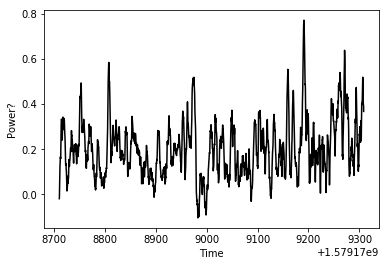

In [63]:
pyl.plot(timestamps, smooth_thetas, color='black')
pyl.xlabel('Time')
pyl.ylabel('Power?')
pyl.savefig('smooth_thetas')
if table is not None:
    for a in corrects:
        pyl.axvline(x=a, color='purple')
    for b in incorrects:
        pyl.axvline(x=b, color='orange')

In [ ]:
pyl.plot(timestamps, smooth_alphas, color='black')
pyl.xlabel('Time')
pyl.ylabel('Power?')
pyl.savefig('smooth_alphas')
if table is not None:
    for a in corrects:
        pyl.axvline(x=a, color='purple')
    for b in incorrects:
        pyl.axvline(x=b, color='orange')

In [ ]:
pyl.plot(timestamps, smooth_betas, color='black')
pyl.xlabel('Time')
pyl.ylabel('Power?')
pyl.savefig('smooth_betas')
if table is not None:
    for a in corrects:
        pyl.axvline(x=a, color='purple')
    for b in incorrects:
        pyl.axvline(x=b, color='orange')

In [ ]:
pyl.plot(timestamps, smooth_gammas, color='black')
pyl.xlabel('Time')
pyl.ylabel('Power?')
pyl.savefig('smooth_gammas')
if table is not None:
    for a in corrects:
        pyl.axvline(x=a, color='purple')
    for b in incorrects:
        pyl.axvline(x=b, color='orange')

In [ ]:
# Alpha Protocol:
# Simple redout of alpha power, divided by delta waves in order to rule out noise
alpha_over_delta = []
# Beta Protocol:
# Beta waves have been used as a measure of mental activity and concentration
# This beta over theta ratio is commonly used as neurofeedback for ADHD
beta_over_theta = []
# Alpha/Theta Protocol:
# This is another popular neurofeedback metric for stress reduction
# Higher theta over alpha is supposedly associated with reduced anxiety
theta_over_alpha = []
# Gamma/Beta:
# I suspect this may indicate when a person's intuition is at its strongest.
# Gamma waves have been associated with psi phenomena by multiple other researchers.
# Beta brainwaves are associated with analytical thinking, which is widely believed to inhibit psi.
gamma_over_beta = []
# here we go!
for x in range(len(smooth_deltas)):
    alpha_over_delta.append(smooth_alphas[x] / smooth_deltas[x])
    beta_over_theta.append(smooth_betas[x] / smooth_thetas[x])
    theta_over_alpha.append(smooth_thetas[x] / smooth_alphas[x])
    gamma_over_beta.append(smooth_gammas[x] / smooth_betas[x])

In [ ]:
pyl.plot(timestamps, gamma_over_beta, color='black')
pyl.xlabel('Time')
pyl.ylabel('Power?')
pyl.savefig('gamma_over_beta')
if table is not None:
    for a in corrects:
        pyl.axvline(x=a, color='purple')
    for b in incorrects:
        pyl.axvline(x=b, color='orange')

In [ ]:
pyl.plot(timestamps, beta_over_theta, color='black')
pyl.xlabel('Time')
pyl.ylabel('Power?')
pyl.savefig('beta_over_theta')
if table is not None:
    for a in corrects:
        pyl.axvline(x=a, color='purple')
    for b in incorrects:
        pyl.axvline(x=b, color='orange')

In [ ]:
pyl.plot(timestamps, theta_over_alpha, color='black')
pyl.xlabel('Time')
pyl.ylabel('Power?')
pyl.savefig('theta_over_alpha')
if table is not None:
    for a in corrects:
        pyl.axvline(x=a, color='purple')
    for b in incorrects:
        pyl.axvline(x=b, color='orange')

In [ ]:
pyl.plot(timestamps, alpha_over_delta, color='black')
pyl.xlabel('Time')
pyl.ylabel('Power?')
pyl.savefig('alpha_over_delta')
if table is not None:
    for a in corrects:
        pyl.axvline(x=a, color='purple')
    for b in incorrects:
        pyl.axvline(x=b, color='orange')

In [ ]:
ceiling = 2
#
remove_these = []
alpha_timestamps = timestamps.copy()
for x in range(len(alpha_over_delta)):
    if abs(alpha_over_delta[x]) > ceiling:
        remove_these.append(x)
if len(remove_these) > 0:
    limited_alpha = []
    limited_alpha_timestamps = []
    remove_these.reverse()
    for y in remove_these:
        if alpha_over_delta[y] > 0:
            limited_alpha.append(ceiling)
        else:
            limited_alpha.append(-ceiling)
        limited_alpha_timestamps.append(alpha_timestamps[y])
        alpha_over_delta.remove(alpha_over_delta[y])
        alpha_timestamps.remove(alpha_timestamps[y])
#
remove_these = []
beta_timestamps = timestamps.copy()
for x in range(len(beta_over_theta)):
    if abs(beta_over_theta[x]) > ceiling:
        remove_these.append(x)
if len(remove_these) > 0:
    limited_beta = []
    limited_beta_timestamps = []
    remove_these.reverse()
    for y in remove_these:
        if beta_over_theta[y] > 0:
            limited_beta.append(ceiling)
        else:
            limited_beta.append(-ceiling)
        limited_beta_timestamps.append(beta_timestamps[y])
        beta_over_theta.remove(beta_over_theta[y])
        beta_timestamps.remove(beta_timestamps[y])
#
remove_these = []
theta_timestamps = timestamps.copy()
for x in range(len(theta_over_alpha)):
    if abs(theta_over_alpha[x]) > ceiling:
        remove_these.append(x)
if len(remove_these) > 0:
    limited_theta = []
    limited_theta_timestamps = []
    remove_these.reverse()
    for y in remove_these:
        if theta_over_alpha[y] > 0:
            limited_theta.append(ceiling)
        else:
            limited_theta.append(-ceiling)
        limited_theta_timestamps.append(theta_timestamps[y])
        theta_over_alpha.remove(theta_over_alpha[y])
        theta_timestamps.remove(theta_timestamps[y])
#
remove_these = []
gamma_timestamps = timestamps.copy()
for x in range(len(gamma_over_beta)):
    if abs(gamma_over_beta[x]) > ceiling:
        remove_these.append(x)
if len(remove_these) > 0:
    limited_gamma = []
    limited_gamma_timestamps = []
    remove_these.reverse()
    for y in remove_these:
        if gamma_over_beta[y] > 0:
            limited_gamma.append(ceiling)
        else:
            limited_gamma.append(-ceiling)
        limited_gamma_timestamps.append(gamma_timestamps[y])
        gamma_over_beta.remove(gamma_over_beta[y])
        gamma_timestamps.remove(gamma_timestamps[y])

In [ ]:
if len(limited_gamma) > 0:
    pyl.plot(gamma_timestamps, gamma_over_beta, color='black')
    pyl.scatter(limited_gamma_timestamps, limited_gamma, color='red')
    pyl.xlabel('Time')
    pyl.ylabel('Power?')
    if table is not None:
        for a in corrects:
            pyl.axvline(x=a, color='purple')
        for b in incorrects:
            pyl.axvline(x=b, color='orange')
    pyl.savefig('limited_gamma')

In [ ]:
if len(limited_beta) > 0:
    pyl.plot(beta_timestamps, beta_over_theta, color='black')
    pyl.scatter(limited_beta_timestamps, limited_beta, color='red')
    pyl.xlabel('Time')
    pyl.ylabel('Power?')
    if table is not None:
        for a in corrects:
            pyl.axvline(x=a, color='purple')
        for b in incorrects:
            pyl.axvline(x=b, color='orange')
    pyl.savefig('limited_beta')

In [ ]:
if len(limited_theta) > 0:
    pyl.plot(theta_timestamps, theta_over_alpha, color='black')
    pyl.scatter(limited_theta_timestamps, limited_theta, color='red')
    pyl.xlabel('Time')
    pyl.ylabel('Power?')
    if table is not None:
        for a in corrects:
            pyl.axvline(x=a, color='purple')
        for b in incorrects:
            pyl.axvline(x=b, color='orange')
    pyl.save_fig('limited_theta')

In [ ]:
if len(limited_alpha) > 0:
    pyl.plot(alpha_timestamps, alpha_over_delta, color='black')
    pyl.scatter(limited_alpha_timestamps, limited_alpha, color='red')
    pyl.xlabel('Time')
    pyl.ylabel('Power?')
    if table is not None:
        for a in corrects:
            pyl.axvline(x=a, color='purple')
        for b in incorrects:
            pyl.axvline(x=b, color='orange')
    pyl.save_fig('limited_alpha')

In [ ]:
try:
    curs.close()
    db.close()
except Exception:
    pass